In [4]:
import pandas as pd
import time
from nba_api.stats.endpoints import leaguedashteamstats, leaguedashplayerstats

season_years = list(range(2014, 2024)) 
season_labels = [f"{year}-{str(year+1)[-2:]}" for year in season_years]

all_rows = []

for label in season_labels:

    team_stats = leaguedashteamstats.LeagueDashTeamStats(
        season=label,
        season_type_all_star='Regular Season'
    ).get_data_frames()[0]
    team_stats['SEASON'] = label
    time.sleep(1.5)

    player_stats = leaguedashplayerstats.LeagueDashPlayerStats(
        season=label,
        season_type_all_star='Regular Season'
    ).get_data_frames()[0]
    player_stats['SEASON'] = label
    time.sleep(1.5)

    top_players = (
        player_stats.sort_values(['TEAM_ID', 'MIN'], ascending=[True, False])
        .groupby('TEAM_ID')
        .head(3)
    )

    agg_cols = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'FG_PCT', 'FG3_PCT', 'PLUS_MINUS']
    top3_summary = top_players.groupby('TEAM_ID')[agg_cols].mean().reset_index()
    top3_summary.columns = ['TEAM_ID'] + [f"TOP3_{col}" for col in agg_cols]
    top3_summary["SEASON"] = label

    adv_stats = leaguedashteamstats.LeagueDashTeamStats(
        season=label,
        measure_type_detailed_defense='Advanced',
        season_type_all_star='Regular Season'
    ).get_data_frames()[0][['TEAM_ID', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PACE']]
    adv_stats["SEASON"] = label
    time.sleep(1.5)

    merged = team_stats.merge(top3_summary, on=["TEAM_ID", "SEASON"], how="left")
    merged = merged.merge(adv_stats, on=["TEAM_ID", "SEASON"], how="left")
    all_rows.append(merged)

final_df = pd.concat(all_rows, ignore_index=True)

rank_cols = [col for col in final_df.columns if "RANK" in col.upper()]
final_df = final_df.drop(columns=rank_cols)

final_df.to_csv("2014_15_to_2023_24_nba_reg_stats.csv", index=False)



🔄 Processing 2014-15...

🔄 Processing 2015-16...

🔄 Processing 2016-17...

🔄 Processing 2017-18...

🔄 Processing 2018-19...

🔄 Processing 2019-20...

🔄 Processing 2020-21...

🔄 Processing 2021-22...

🔄 Processing 2022-23...

🔄 Processing 2023-24...
✅ Final dataset saved as nba_team_full_stats_2014_15_to_2023_24.csv


In [22]:
season_years = list(range(2014, 2024))
season_labels = [f"{year}-{str(year+1)[-2:]}" for year in season_years]

playoff_data = []

for season in season_labels:

    basic_stats = leaguedashteamstats.LeagueDashTeamStats(
        season=season,
        season_type_all_star='Playoffs'
    ).get_data_frames()[0]

    adv_stats = leaguedashteamstats.LeagueDashTeamStats(
        season=season,
        season_type_all_star='Playoffs',
        measure_type_detailed_defense='Advanced'
    ).get_data_frames()[0][['TEAM_ID', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PACE']]

    player_stats = leaguedashplayerstats.LeagueDashPlayerStats(
        season=season,
        season_type_all_star='Playoffs'
    ).get_data_frames()[0]

    top_players = (
        player_stats.sort_values(['TEAM_ID', 'MIN'], ascending=[True, False])
        .groupby('TEAM_ID')
        .head(3)
    )

    top3_cols = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'FG_PCT', 'FG3_PCT', 'PLUS_MINUS']
    top3_summary = top_players.groupby('TEAM_ID')[top3_cols].mean().reset_index()
    top3_summary.columns = ['TEAM_ID'] + [f"TOP3_{col}" for col in top3_cols]

    merged = basic_stats.merge(adv_stats, on='TEAM_ID', how='left')
    merged = merged.merge(top3_summary, on='TEAM_ID', how='left')
    merged['SEASON'] = season

    playoff_data.append(merged)
    time.sleep(1.5)

df_playoffs = pd.concat(playoff_data, ignore_index=True)

rank_cols = [col for col in df_playoffs.columns if "RANK" in col.upper()]
df_playoffs = df_playoffs.drop(columns=rank_cols)

df_playoffs.to_csv("2014_15_to_2023_24_nba_playoff_stats.csv", index=False)

In [2]:
import pandas as pd
df_reg = pd.read_csv("2014_15_to_2023_24_nba_reg_stats.csv")
df_playoff = pd.read_csv("2014_15_to_2023_24_nba_playoff_stats.csv")

playoff_teams = df_playoff[['TEAM_NAME', 'SEASON']].drop_duplicates()
playoff_teams['made_playoffs'] = 1

df_reg = df_reg.merge(playoff_teams, on=['TEAM_NAME', 'SEASON'], how='left')

df_reg['made_playoffs'] = df_reg['made_playoffs'].fillna(0).astype(int)



In [3]:
df_reg.head(10)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOP3_BLK,TOP3_TOV,TOP3_FG_PCT,TOP3_FG3_PCT,TOP3_PLUS_MINUS,OFF_RATING,DEF_RATING,NET_RATING,PACE,made_playoffs
0,1610612737,Atlanta Hawks,82,60,22,0.732,3946.0,3121,6699,0.466,...,69.666667,124.333333,0.500333,0.384667,439.666667,108.2,102.3,5.9,94.66,1
1,1610612738,Boston Celtics,82,40,42,0.488,3976.0,3193,7211,0.443,...,22.000000,130.000000,0.453667,0.303333,-121.666667,103.8,103.5,0.3,96.71,1
2,1610612751,Brooklyn Nets,82,38,44,0.463,3986.0,3069,6804,0.451,...,17.333333,148.333333,0.446667,0.318667,-216.333333,103.4,106.3,-3.0,93.69,1
3,1610612766,Charlotte Hornets,82,33,49,0.402,3981.0,2913,6932,0.420,...,29.666667,90.000000,0.415333,0.331000,-125.666667,99.6,103.0,-3.4,93.45,0
4,1610612741,Chicago Bulls,82,50,32,0.610,3976.0,3001,6797,0.442,...,85.666667,124.666667,0.467000,0.280000,168.666667,106.3,103.3,3.0,93.80,1
5,1610612739,Cleveland Cavaliers,82,53,29,0.646,3956.0,3089,6739,0.458,...,36.000000,193.333333,0.463333,0.378667,454.000000,110.1,105.3,4.8,93.23,1
6,1610612742,Dallas Mavericks,82,50,32,0.610,3976.0,3255,7036,0.463,...,49.666667,128.333333,0.523333,0.221667,227.666667,108.2,104.9,3.2,96.40,1
7,1610612743,Denver Nuggets,82,30,52,0.366,3976.0,3099,7158,0.433,...,31.666667,137.666667,0.457333,0.269333,-95.666667,103.9,107.1,-3.3,96.87,0
8,1610612765,Detroit Pistons,82,32,50,0.390,3966.0,3041,7038,0.432,...,60.000000,133.333333,0.449667,0.214667,42.000000,104.3,105.4,-1.1,93.68,0
9,1610612744,Golden State Warriors,82,67,15,0.817,3946.0,3410,7137,0.478,...,58.333333,177.000000,0.464333,0.406333,844.666667,110.4,100.4,9.9,99.28,1


In [4]:
champions = {
    "2014-15": "Golden State Warriors",
    "2015-16": "Cleveland Cavaliers",
    "2016-17": "Golden State Warriors",
    "2017-18": "Golden State Warriors",
    "2018-19": "Toronto Raptors",
    "2019-20": "Los Angeles Lakers",
    "2020-21": "Milwaukee Bucks",
    "2021-22": "Golden State Warriors",
    "2022-23": "Denver Nuggets",
    "2023-24": None
}

df_playoff['won_championship'] = df_playoff.apply(
    lambda row: 1 if champions.get(row['SEASON']) == row['TEAM_NAME'] else 0,
    axis=1
)


In [5]:
df_playoff.head(10)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOP3_REB,TOP3_AST,TOP3_STL,TOP3_BLK,TOP3_TOV,TOP3_FG_PCT,TOP3_FG3_PCT,TOP3_PLUS_MINUS,SEASON,won_championship
0,1610612737,Atlanta Hawks,16,8,8,0.500,778.0,590,1369,0.431,...,95.666667,64.666667,22.333333,8.666667,30.666667,0.434333,0.344000,45.000000,2014-15,0
1,1610612738,Boston Celtics,4,0,4,0.000,192.0,139,331,0.420,...,18.666667,16.666667,3.000000,0.000000,8.666667,0.359000,0.310000,-12.333333,2014-15,0
2,1610612751,Brooklyn Nets,6,2,4,0.333,293.0,217,499,0.435,...,41.000000,14.666667,5.000000,5.000000,6.333333,0.415333,0.208667,-40.333333,2014-15,0
3,1610612741,Chicago Bulls,12,6,6,0.500,586.0,421,1005,0.419,...,85.666667,51.333333,17.666667,9.666667,26.333333,0.415000,0.245667,46.666667,2014-15,0
4,1610612739,Cleveland Cavaliers,20,14,6,0.700,975.0,694,1654,0.420,...,180.000000,67.000000,21.000000,20.333333,36.666667,0.445000,0.194000,59.000000,2014-15,0
5,1610612742,Dallas Mavericks,5,1,4,0.200,240.0,208,460,0.452,...,40.666667,13.000000,5.000000,3.666667,10.333333,0.525000,0.200667,-15.666667,2014-15,0
6,1610612744,Golden State Warriors,21,16,5,0.762,1023.0,802,1769,0.453,...,132.666667,99.000000,31.000000,15.666667,60.333333,0.439667,0.358667,158.666667,2014-15,1
7,1610612745,Houston Rockets,17,9,8,0.529,816.0,635,1417,0.448,...,148.000000,64.000000,27.000000,16.000000,45.666667,0.480667,0.252667,-2.666667,2014-15,0
8,1610612746,Los Angeles Clippers,14,7,7,0.500,677.0,553,1187,0.466,...,131.666667,42.000000,13.333333,17.333333,29.333333,0.554000,0.180333,41.000000,2014-15,0
9,1610612763,Memphis Grizzlies,11,6,5,0.545,528.0,393,925,0.425,...,78.000000,32.000000,9.333333,6.333333,17.333333,0.455667,0.222333,-11.000000,2014-15,0


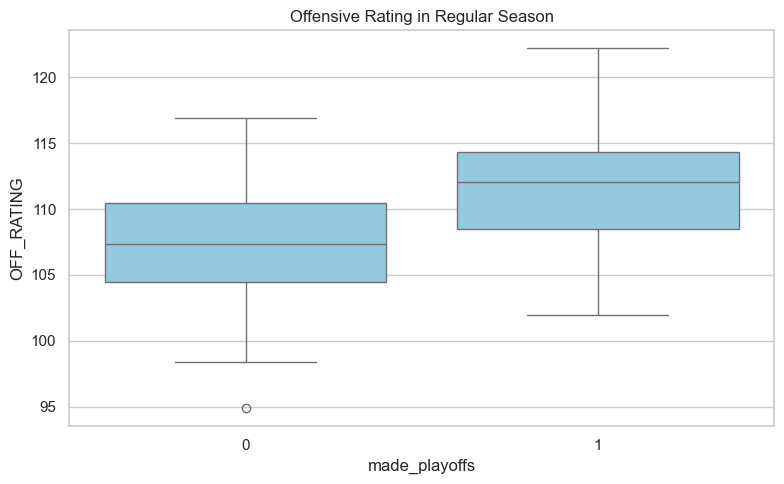

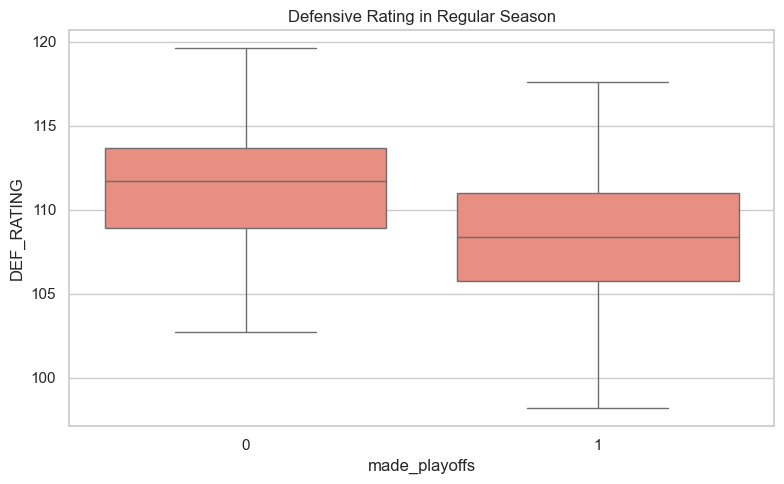

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_reg, x="made_playoffs", y="OFF_RATING", color="skyblue")
plt.title("Offensive Rating in Regular Season")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_reg, x="made_playoffs", y="DEF_RATING", color="salmon")
plt.title("Defensive Rating in Regular Season")
plt.tight_layout()
plt.show()


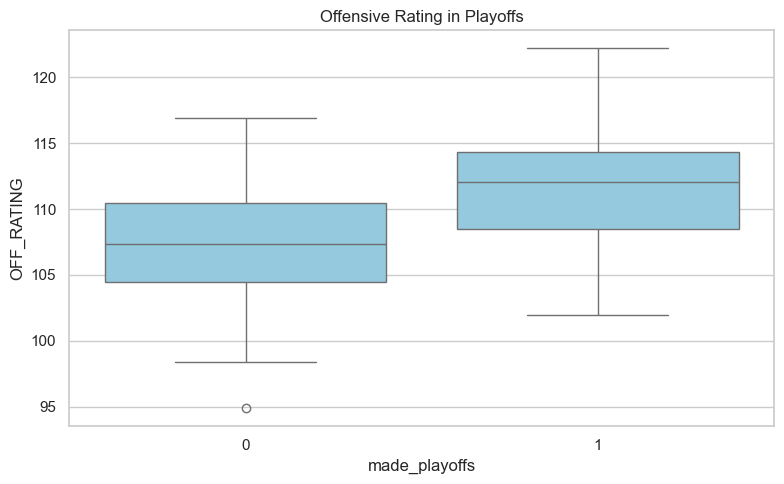

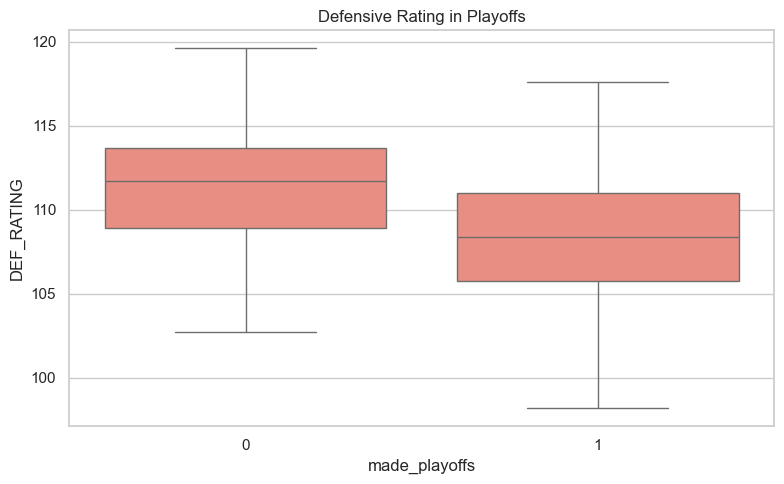

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_reg, x="made_playoffs", y="OFF_RATING", color="skyblue")
plt.title("Offensive Rating in Playoffs")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_reg, x="made_playoffs", y="DEF_RATING", color="salmon")
plt.title("Defensive Rating in Playoffs")
plt.tight_layout()
plt.show()

In [8]:
df_playoff['FG3A_RATE'] = df_playoff['FG3A'] / df_playoff['FGA']
df_playoff['FG3A_RATE'] = df_playoff['FG3A_RATE'].fillna(0)

drop_cols = [
    'TEAM_ID', 'MIN', 'OREB', 'DREB', 'BLKA', 'PF', 'PFD',
    'TOP3_TOV', 'TOP3_FG3_PCT', 'TOP3_PLUS_MINUS', 'TOP3_AST', 'TOP3_REB'
]

df_playoff_cleaned = df_playoff.drop(columns=[col for col in drop_cols if col in df_playoff.columns])
df_playoff_cleaned.to_csv("cleaned_playoff_stats.csv", index=False)

In [9]:
df_reg['FG3A_RATE'] = df_reg['FG3A'] / df_reg['FGA']
df_reg['FG3A_RATE'] = df_reg['FG3A_RATE'].fillna(0)

drop_cols = [
    'TEAM_ID', 'MIN', 'OREB', 'DREB', 'BLKA', 'PF', 'PFD',
    'TOP3_TOV', 'TOP3_FG3_PCT', 'TOP3_PLUS_MINUS', 'TOP3_AST', 'TOP3_REB'
]

df_reg_cleaned = df_reg.drop(columns=[col for col in drop_cols if col in df_reg.columns])

df_reg_cleaned.to_csv("cleaned_regular_season_stats.csv", index=False)


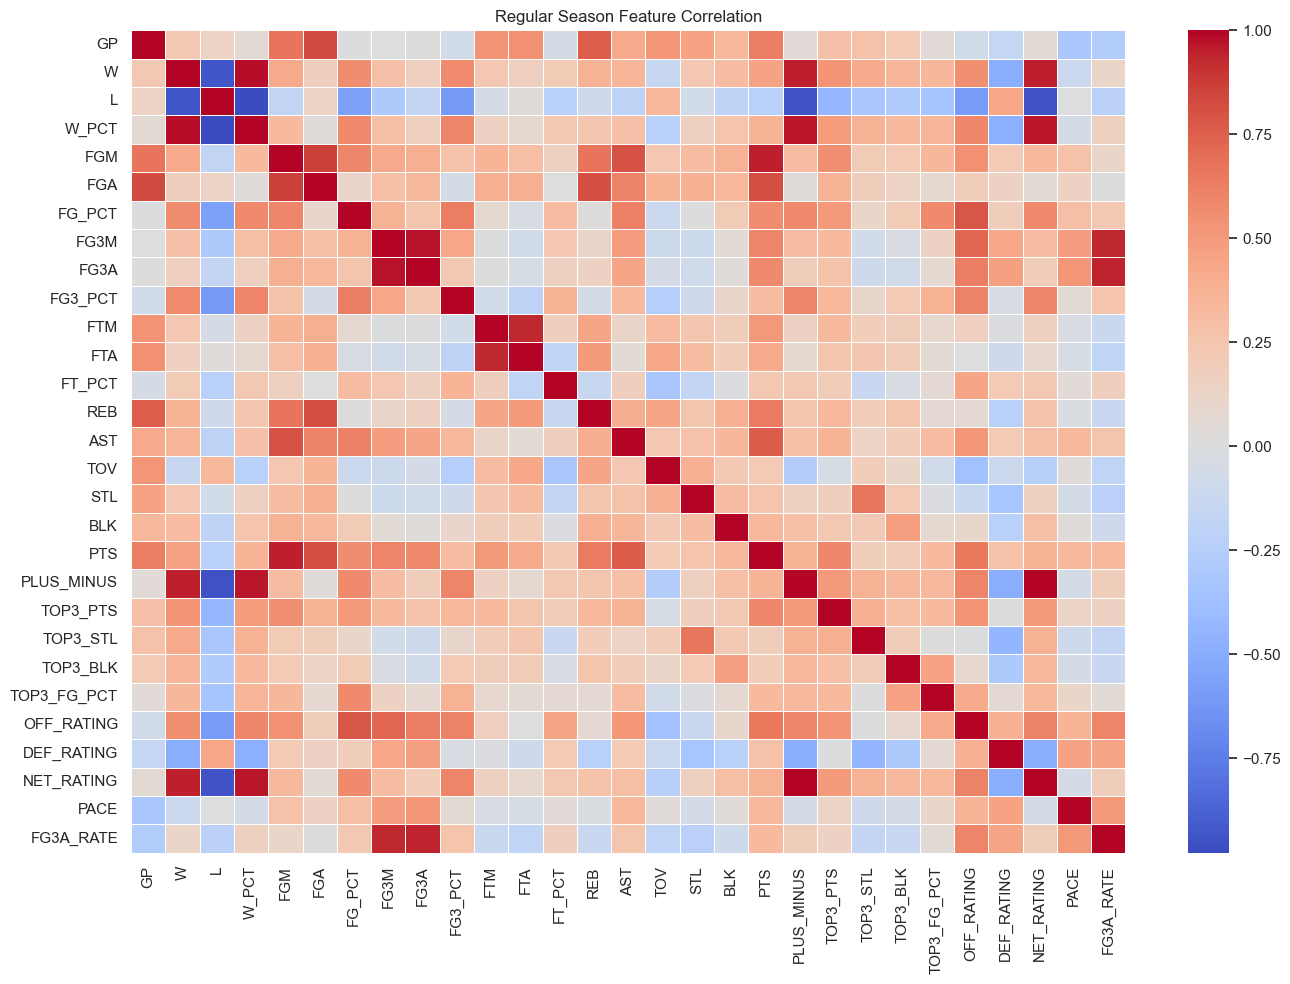

In [10]:
# Compute correlation matrices for both datasets (numeric only)
corr_regular = df_reg_cleaned.drop(columns=['made_playoffs']).corr(numeric_only=True)
corr_playoff = df_playoff_cleaned.drop(columns=['won_championship']).corr(numeric_only=True)

# Plot regular season heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_regular, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Regular Season Feature Correlation")
plt.tight_layout()
plt.show()


In [11]:
df_playoff = pd.read_csv("cleaned_playoff_stats.csv")

cols_to_normalize = [
    'FGM', 'FGA', 'FG3M', 'FG3A',
    'FTM', 'FTA', 'REB', 'AST', 'TOV',
    'STL', 'BLK', 'PTS', 'PLUS_MINUS',
    'TOP3_PTS', 'TOP3_STL', 'TOP3_BLK'
]

# Divide each by GP to get per-game averages
for col in cols_to_normalize:
    df_playoff[col] = df_playoff[col] / df_playoff['GP']

df_playoff.to_csv("playoff_stats_normalized.csv", index=False)

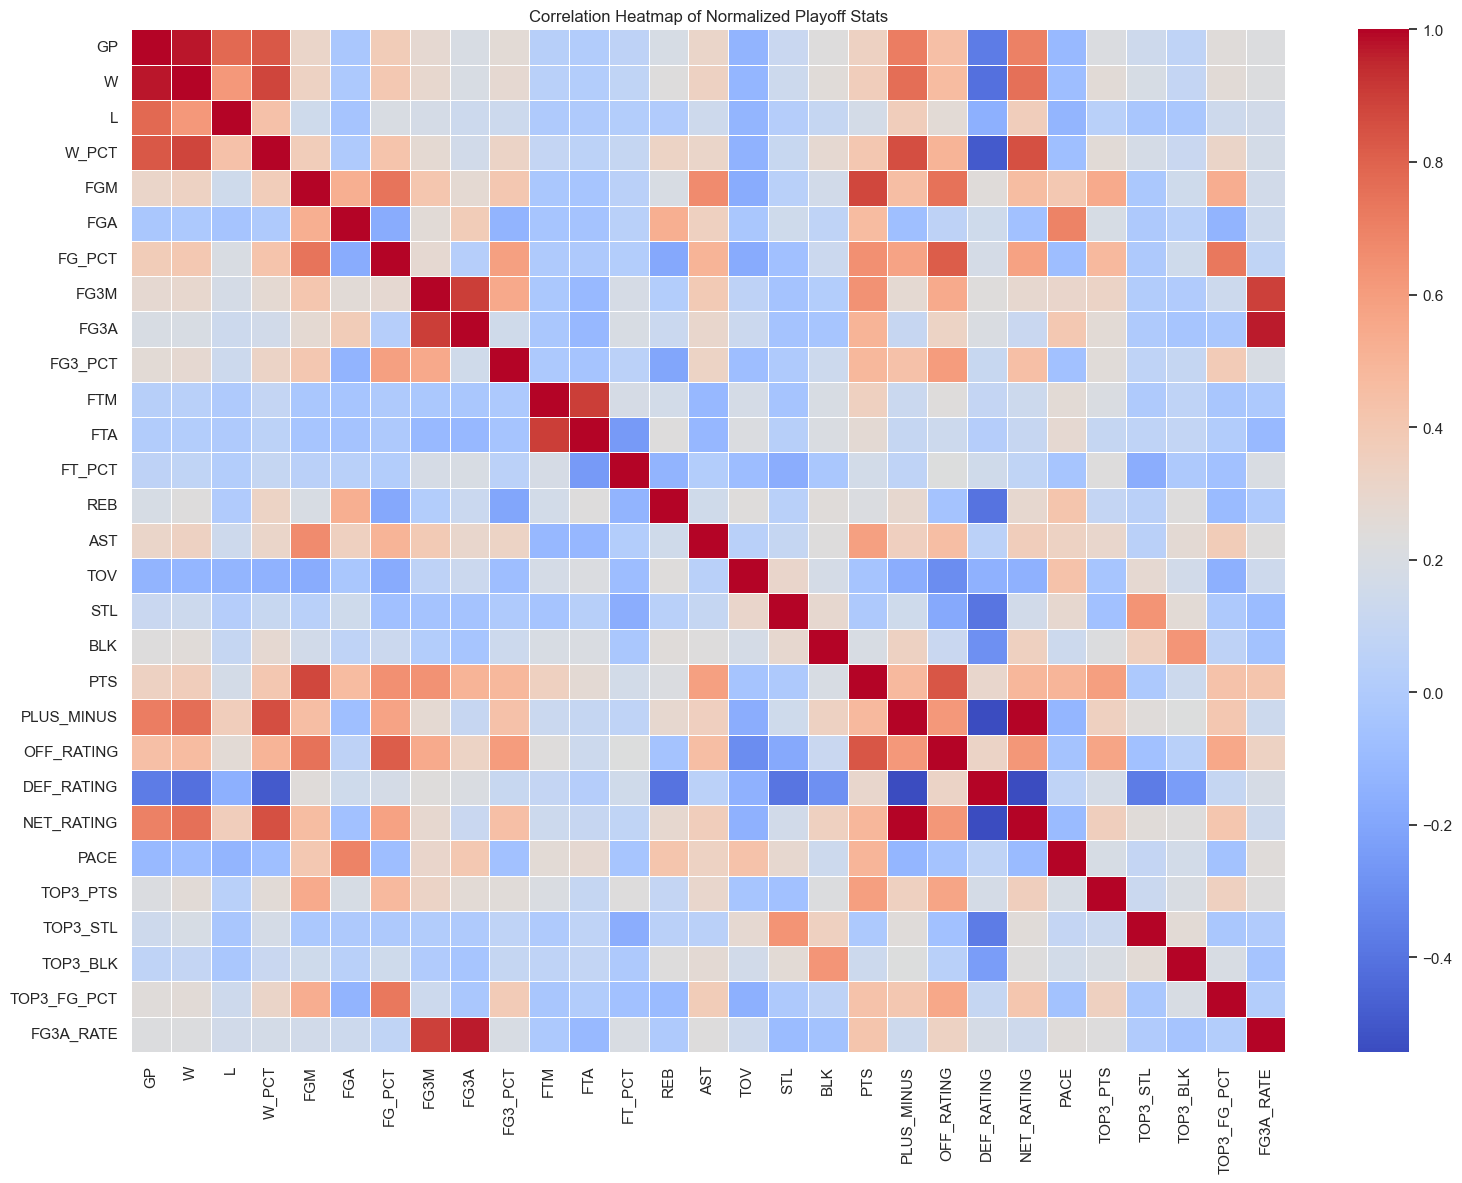

In [12]:
df_playoff_normalized = pd.read_csv("playoff_stats_normalized.csv")

corr_matrix = df_playoff_normalized.drop(columns=['TEAM_NAME', 'won_championship'], errors='ignore').corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Normalized Playoff Stats")
plt.tight_layout()
plt.show()

In [39]:
correlations = df_playoff_normalized.corr(numeric_only=True)['won_championship'].drop('won_championship').sort_values(ascending=False)

print("Correlation of features with 'won_championship':")
print(correlations)

Correlation of features with 'won_championship':
W              0.556879
GP             0.437479
W_PCT          0.418901
PLUS_MINUS     0.371090
NET_RATING     0.369781
AST            0.269725
TOP3_PTS       0.243158
FG_PCT         0.235793
FGM            0.230254
OFF_RATING     0.210317
TOP3_STL       0.195930
PTS            0.192906
STL            0.180179
REB            0.153648
FG3_PCT        0.126131
FG3M           0.118871
TOP3_FG_PCT    0.090000
BLK            0.089067
FG3A           0.077694
FG3A_RATE      0.073764
TOP3_BLK       0.059277
FGA            0.037254
PACE           0.022420
TOV            0.006552
L             -0.011447
FT_PCT        -0.013416
FTA           -0.051153
FTM           -0.052190
DEF_RATING    -0.221803
Name: won_championship, dtype: float64


In [40]:
correlations = df_reg_cleaned.corr(numeric_only=True)['made_playoffs'].drop('made_playoffs').sort_values(ascending=False)

# Display the sorted correlations
print("Correlation of features with 'made_playoffs':")
print(correlations)


Correlation of features with 'made_playoffs':
W_PCT          0.797935
W              0.784369
NET_RATING     0.743110
PLUS_MINUS     0.740516
FG3_PCT        0.449548
OFF_RATING     0.444816
FG_PCT         0.430757
TOP3_PTS       0.364454
TOP3_FG_PCT    0.322636
TOP3_STL       0.299673
TOP3_BLK       0.268013
PTS            0.257963
FT_PCT         0.233442
FGM            0.211394
FG3M           0.207185
FTM            0.173444
BLK            0.160170
REB            0.159970
AST            0.159181
STL            0.126726
FG3A_RATE      0.120500
FG3A           0.113927
FTA            0.094100
GP             0.049040
FGA           -0.003807
PACE          -0.091305
TOV           -0.181692
DEF_RATING    -0.375560
L             -0.779427
Name: made_playoffs, dtype: float64


In [1]:
import pandas as pd

# Load regular season data
df = pd.read_csv("cleaned_regular_season_stats.csv")

# Dictionary of championship teams by season
champions = {
    '2013-14': 'San Antonio Spurs',
    '2014-15': 'Golden State Warriors',
    '2015-16': 'Cleveland Cavaliers',
    '2016-17': 'Golden State Warriors',
    '2017-18': 'Golden State Warriors',
    '2018-19': 'Toronto Raptors',
    '2019-20': 'Los Angeles Lakers',
    '2020-21': 'Milwaukee Bucks',
    '2021-22': 'Golden State Warriors',
    '2022-23': 'Denver Nuggets',
}

# Create the won_championship column
df['won_championship'] = df.apply(
    lambda row: 1 if row['SEASON'] in champions and row['TEAM_NAME'] == champions[row['SEASON']] else 0,
    axis=1
)

# Save the updated dataset
df.to_csv("regular_season_with_championship.csv", index=False)
